<a href="https://colab.research.google.com/github/jinyoung0711/iwantsuccess/blob/main/%5B%EC%A7%84%EC%98%81%5D_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**import**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import statsmodels.api as sm

**EDA **

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data.csv")
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 0:00,3.130000e+05,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 0:00,2.384000e+06,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 0:00,3.420000e+05,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 0:00,4.200000e+05,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 0:00,5.500000e+05,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 0:00,3.081667e+05,3,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 0:00,5.343333e+05,3,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 0:00,4.169042e+05,3,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 0:00,2.034000e+05,4,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


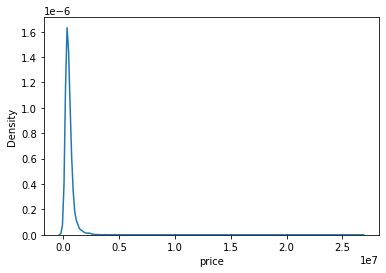

In [ ]:
import seaborn as sns

sns.distplot(df['price'], hist = False)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.46155,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.00000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.25000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.00000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.00000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.50000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.00000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.00000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.00000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.00000,2300.00,9410.0


In [ ]:
df['price'] = (df['price']).astype(float )
df['floors'] = (df['floors']).astype(int)
df['bedrooms'] = (df['bedrooms']).astype(int)

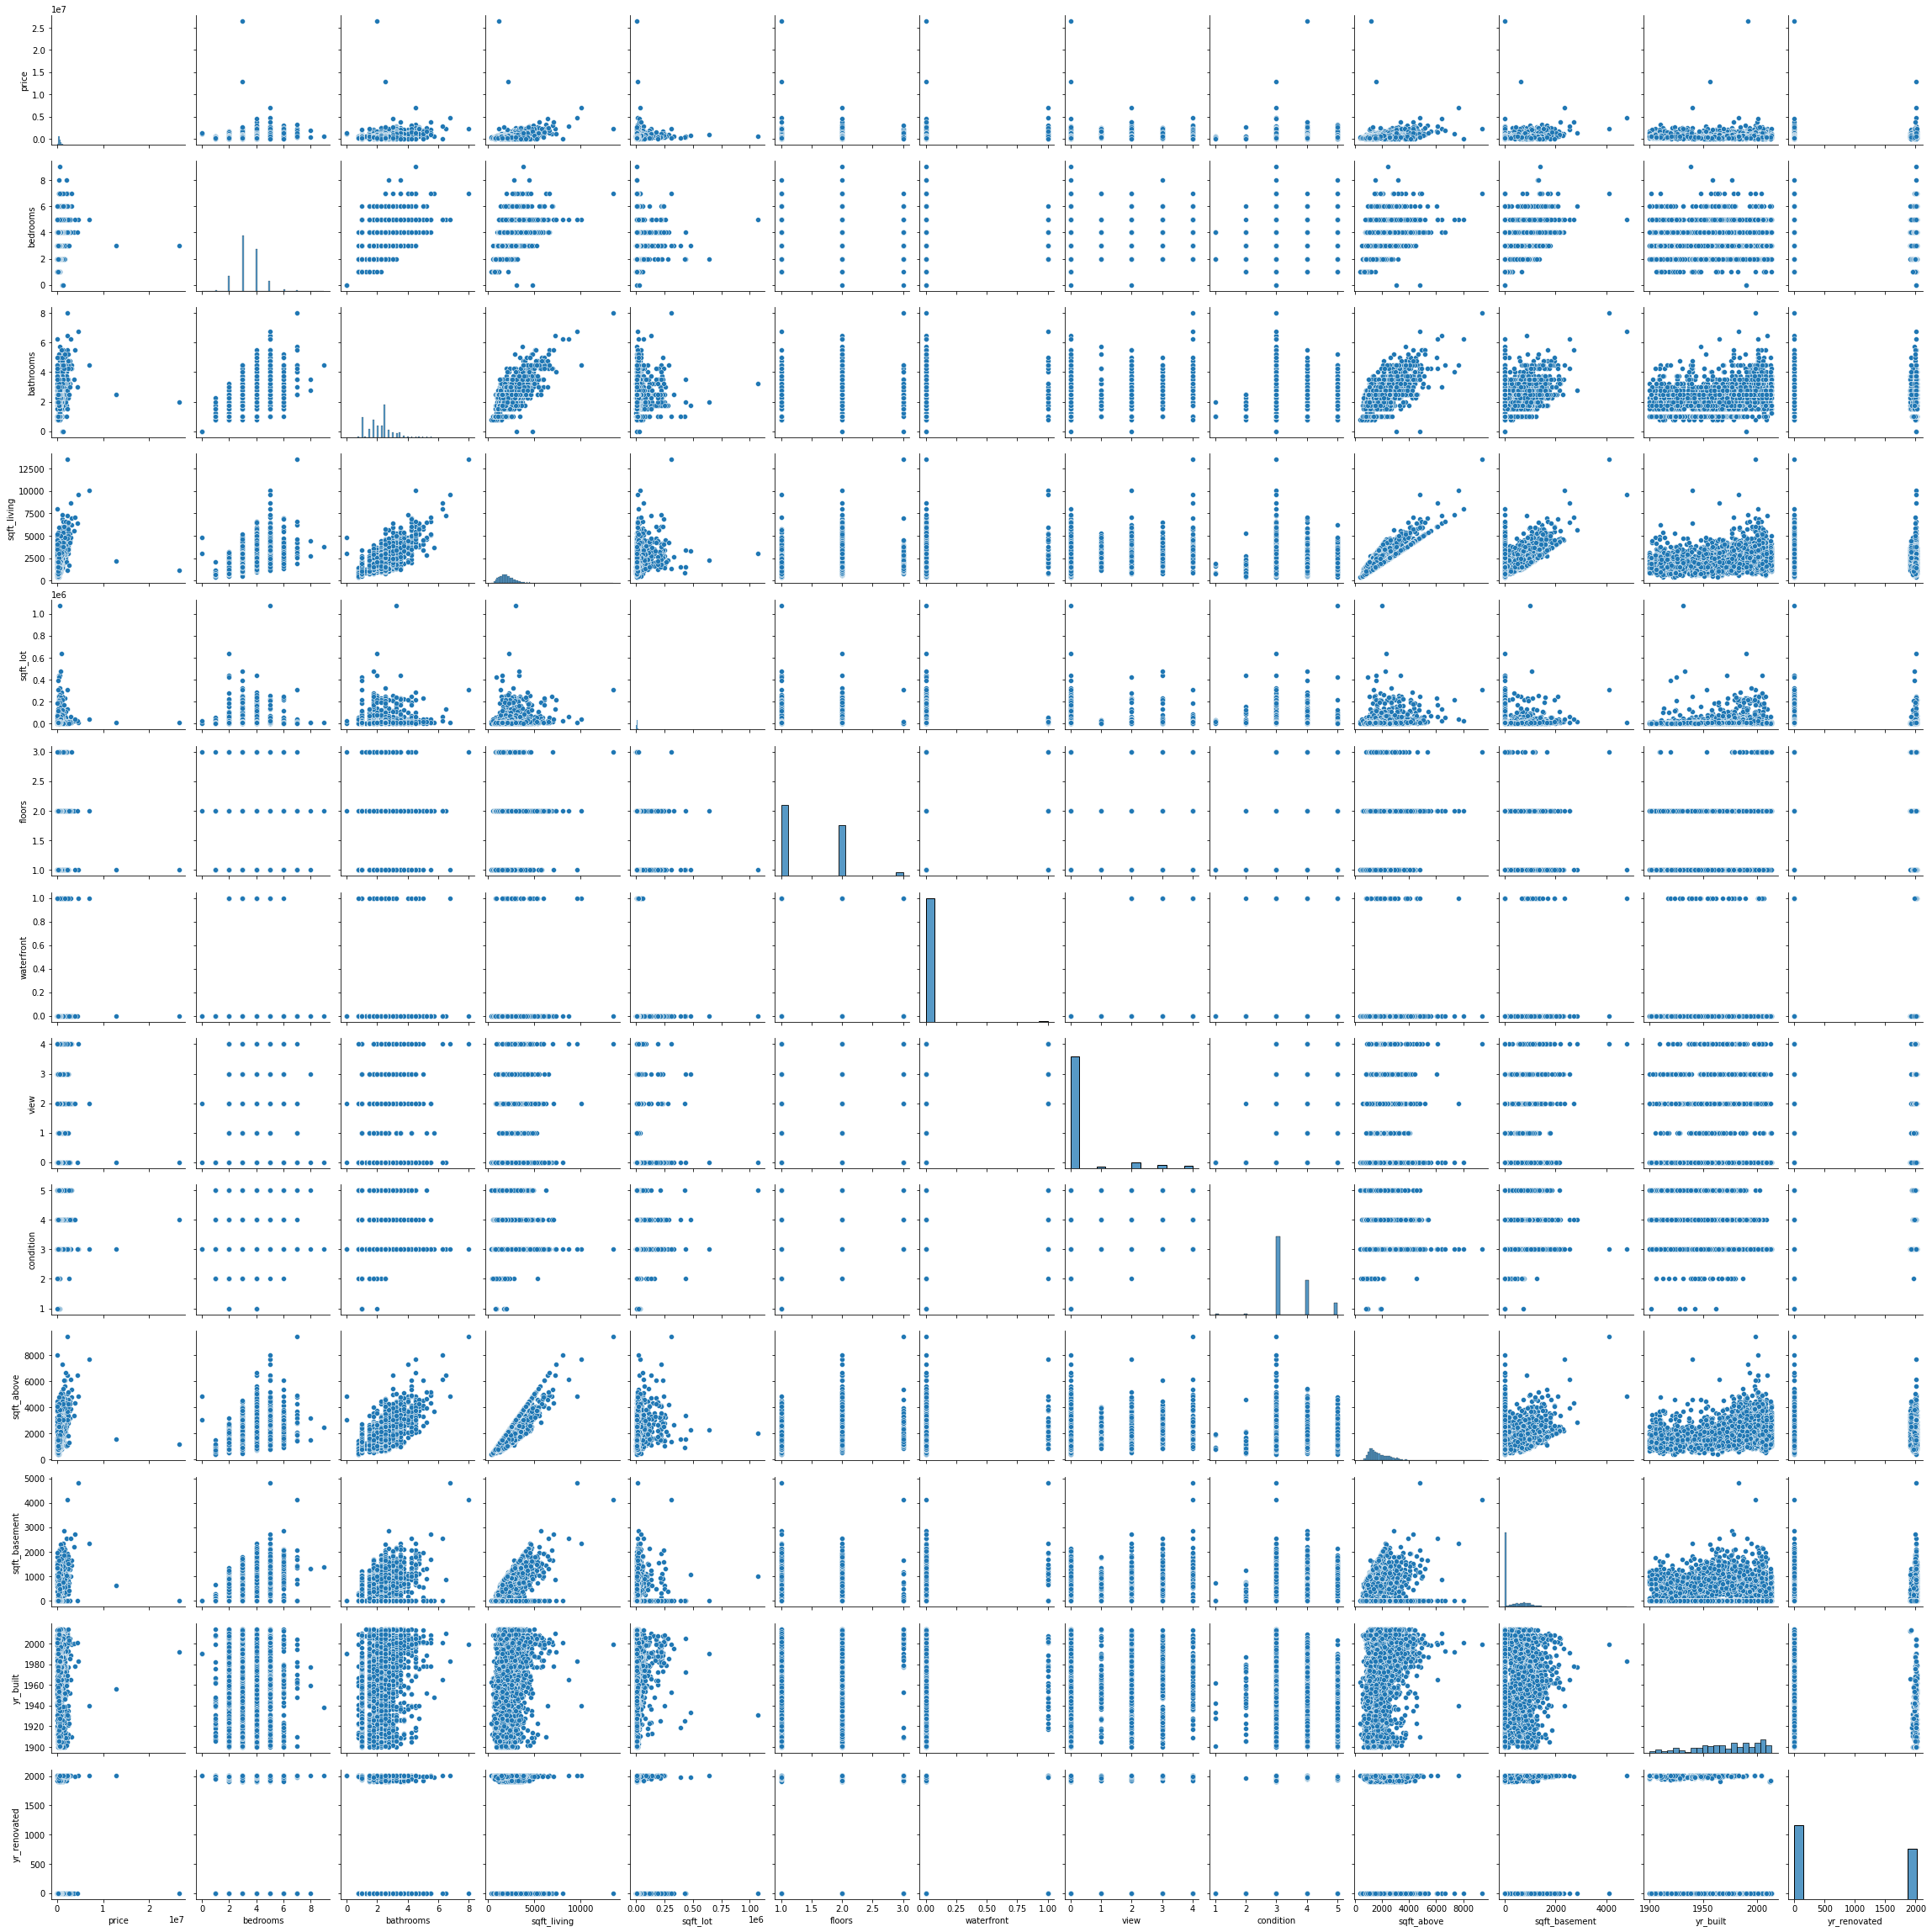

In [ ]:
sns.pairplot(df)
plt.show()

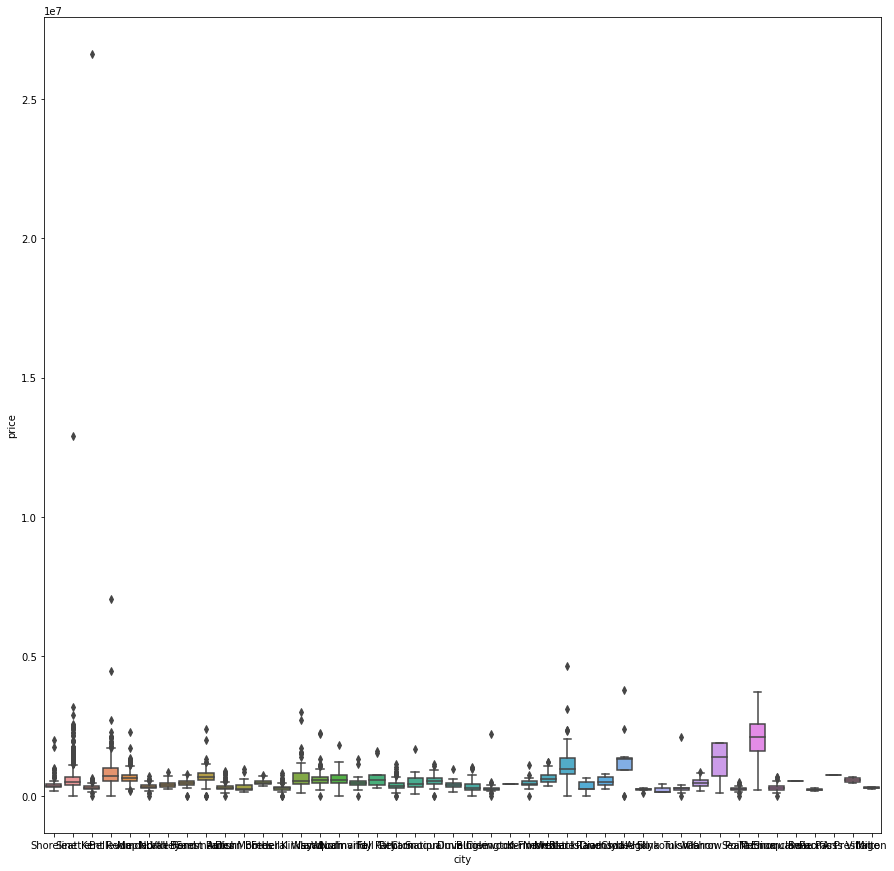

In [ ]:
plt.figure(figsize=(15, 15))
 
sns.boxplot(x = 'city', y = 'price', data = df)

plt.show()

**데이터 전처리 요약 **

price : 0인 값 (49개 제거), 이상치 q3+1.5*iqr인 값 (240개 제거)

date, country, street, city, statezip, yr_built, yr_renovated, condition : 제거

yr_renovated : if renovated value = 1 else 0

waterfront : 0(4563) 1(33) 일단 보류

In [ ]:
df2 = df.drop(['date', 'country', 'street', 'city','statezip', 'yr_built', 'yr_renovated', 'condition'], axis = 1)
df2

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement
0,3.130000e+05,3,1.50,1340,7912,1,0,0,1340,0
1,2.384000e+06,5,2.50,3650,9050,2,0,4,3370,280
2,3.420000e+05,3,2.00,1930,11947,1,0,0,1930,0
3,4.200000e+05,3,2.25,2000,8030,1,0,0,1000,1000
4,5.500000e+05,4,2.50,1940,10500,1,0,0,1140,800
...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3,1.75,1510,6360,1,0,0,1510,0
4596,5.343333e+05,3,2.50,1460,7573,2,0,0,1460,0
4597,4.169042e+05,3,2.50,3010,7014,2,0,0,3010,0
4598,2.034000e+05,4,2.00,2090,6630,1,0,0,1070,1020


In [ ]:
df2['price'].value_counts()

0.0          49
300000.0     42
400000.0     31
440000.0     29
450000.0     29
             ..
684680.0      1
609900.0      1
1635000.0     1
1339000.0     1
220600.0      1
Name: price, Length: 1741, dtype: int64

In [ ]:
temp = df2[df2['price'] == 0].index
temp

Int64Index([4354, 4356, 4357, 4358, 4361, 4362, 4374, 4376, 4382, 4383, 4385,
            4386, 4389, 4394, 4405, 4408, 4411, 4412, 4413, 4420, 4442, 4448,
            4453, 4454, 4472, 4478, 4479, 4480, 4481, 4487, 4499, 4507, 4509,
            4520, 4521, 4522, 4523, 4528, 4534, 4542, 4552, 4554, 4555, 4558,
            4563, 4567, 4574, 4575, 4588],
           dtype='int64')

In [ ]:
df2.drop(temp, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


NameError: ignored

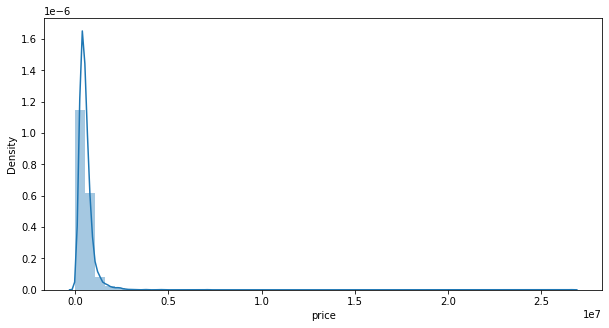

In [ ]:
plt.figure(figsize=(10,5))

sns.distplot(df2.price, kde=True)


# 이상치 영역 박스 그리기

plt.axvspan(xmin=lower, xmax=df2.price.min(), alpha=0.2, color='red')

plt.axvspan(xmin=upper, xmax=df2.price.max(), alpha=0.2, color='red')

In [ ]:
%matplotlib inline

q1=df2['price'].quantile(0.25)
q3=df2['price'].quantile(0.75)
iqr=q3-q1

In [ ]:
condition=df2['price']>q3+1.5*iqr
a=df2[condition].index
df2.drop(a,inplace=True)

In [ ]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4311.0,487456.901904,215659.641022,7800.0,320000.00,450000.00,615000.0,1150000.00
bedrooms,4311.0,3.351659,0.881215,0.0,3.00,3.00,4.0,9.00
bathrooms,4311.0,2.094352,0.715171,0.0,1.75,2.25,2.5,5.75
sqft_living,4311.0,2030.697982,810.138266,370.0,1430.00,1920.00,2510.0,7320.00
sqft_lot,4311.0,14598.596149,36141.110719,638.0,5000.00,7566.00,10696.5,1074218.00
floors,4311.0,1.443517,0.550890,1.0,1.00,1.00,2.0,3.00
waterfront,4311.0,0.003711,0.060815,0.0,0.00,0.00,0.0,1.00
view,4311.0,0.173742,0.644964,0.0,0.00,0.00,0.0,4.00
sqft_above,4311.0,1747.008583,763.543329,370.0,1170.00,1540.00,2190.0,7320.00
sqft_basement,4311.0,283.689399,422.527450,0.0,0.00,0.00,560.0,2300.00


In [ ]:
import seaborn as sns

sns.distplot(df2['price'], histS = False)

TypeError: ignored

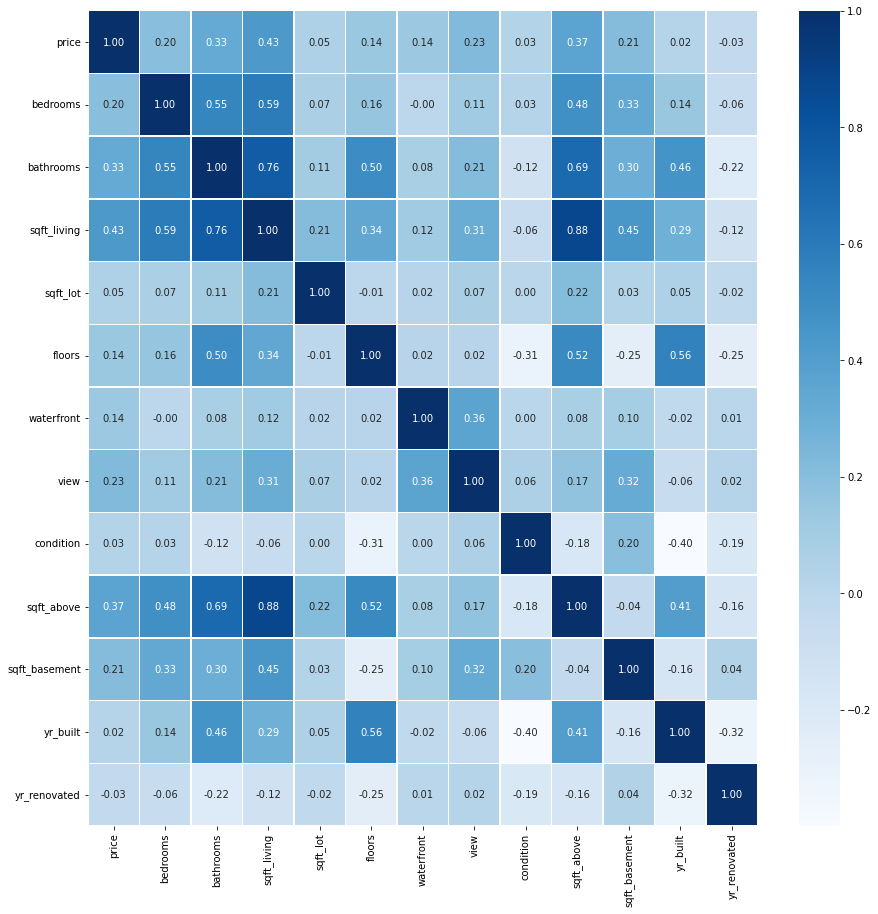

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data = df.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

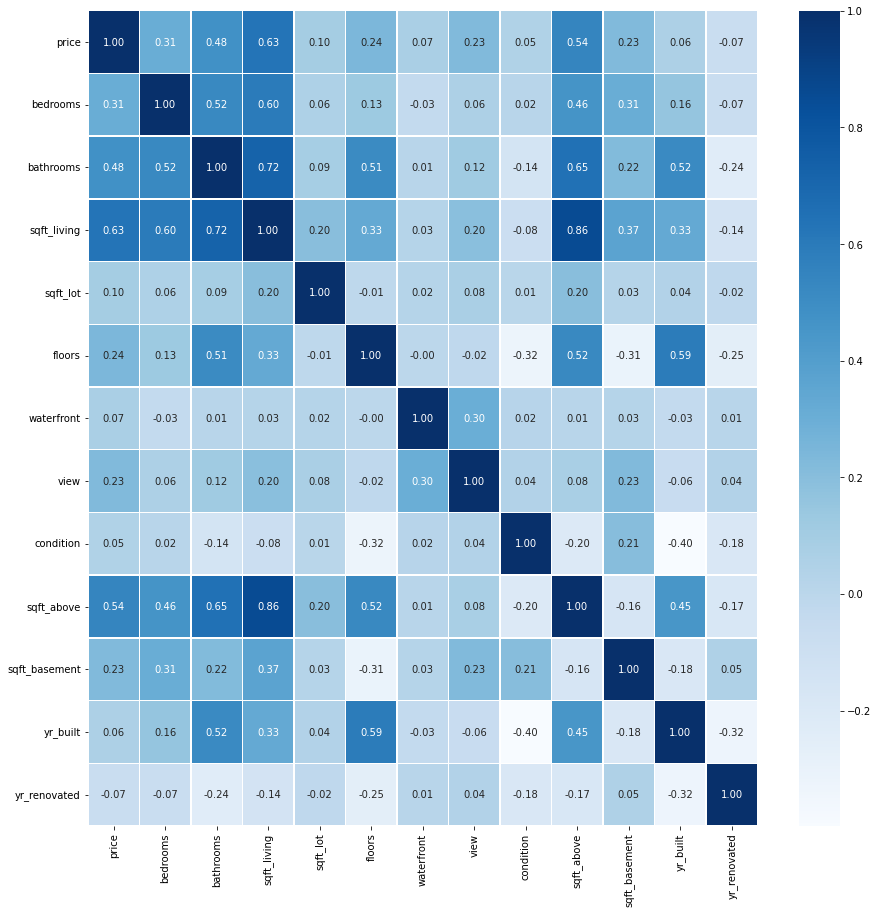

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data = df2.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

train / test set 분할 

In [ ]:
train_set, test_set = train_test_split(df2, test_size = 0.2, random_state=42)

In [ ]:
train_set.shape

(3448, 10)

In [ ]:
test_set.shape

(863, 10)

In [ ]:
train_X = train_set.iloc[:, 1:12]
train_X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement
1174,3,1.00,1070,6109,1,0,0,1070,0
2321,3,1.50,1360,9760,1,0,0,1360,0
3844,3,2.25,1550,5511,2,0,0,1550,0
3856,3,2.00,1340,7200,1,0,0,1340,0
801,3,2.50,2670,13218,1,0,0,2670,0


In [ ]:
train_Y = train_set.iloc[:, 0]
train_Y.head()

1174    337000.0
2321    240000.0
3844    481015.0
3856    545000.0
801     425000.0
Name: price, dtype: float64

In [ ]:
test_X = test_set.iloc[:, 1:12]
test_X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement
2922,4,2.50,1890,12236,1,0,0,1230,660
1830,5,2.75,2481,4045,2,0,0,2481,0
4202,4,3.75,4260,9800,2,0,0,4260,0
3679,4,2.50,2340,11784,2,0,0,2340,0
3319,3,1.50,2330,11740,1,0,0,1330,1000


In [ ]:
test_Y = test_set.iloc[:, 0]
test_Y.head()

2922     378000.0
1830     309000.0
4202    1065000.0
3679     330000.0
3319     450000.0
Name: price, dtype: float64

In [ ]:
print(len(train_X), len(test_X))

3448 863


In [ ]:
train_X = train_X.to_numpy()
train_Y = train_Y.to_numpy()
test_X = test_X.to_numpy()
test_Y = test_Y.to_numpy()

In [ ]:
train_X.shape

(3448, 9)

In [ ]:
# 데이터 전처리(정규화)
x_mean = train_X.mean(axis = 0)
x_std = train_X.std(axis=0)

print(x_mean)
print(x_std)
train_X -= x_mean
train_X /= x_std

x_mean1 = test_X.mean(axis=0)
x_std1 = test_X.std(axis=0)
print(x_mean1)
print(x_std1)
test_X -= x_mean
test_X /= x_std

y_mean = train_Y.mean()
y_std = train_Y.std()
print(y_mean)
print(y_std)
train_Y -= y_mean
train_Y /= y_std

y_mean1 = test_Y.mean(axis=0)
y_std1 = test_Y.std(axis=0)
print(y_mean1)
print(y_std1)
test_Y -= y_mean
test_Y /= y_std

#print(train_X[0])
#print(train_Y[0])

[3.34947796e+00 2.08918213e+00 2.02807396e+03 1.46875853e+04
 1.43938515e+00 3.48027842e-03 1.70533643e-01 1.74443968e+03
 2.83634281e+02]
[8.73673848e-01 7.18060535e-01 8.10364819e+02 3.72956979e+04
 5.47969119e-01 5.88911376e-02 6.35777430e-01 7.59958706e+02
 4.24023149e+02]
[3.36037080e+00 2.11500579e+00 2.04118192e+03 1.42430521e+04
 1.46002317e+00 4.63499421e-03 1.86558517e-01 1.75727231e+03
 2.83909618e+02]
[9.10174675e-01 7.02708034e-01 8.08677469e+02 3.10764299e+04
 5.61791126e-01 6.79228315e-02 6.79925767e-01 7.77181169e+02
 4.16249498e+02]
486078.52807050466
215392.21520197488
492964.00848539977
216512.89257342494


In [ ]:
# 회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=128, activation='relu', input_shape=(9,)),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1280      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11,649
Trainable params: 11,649
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# 회귀 모델 학습
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.20)

Epoch 1/25
87/87 [==============================] - 1s 3ms/step - loss: 0.9645 - val_loss: 0.6952
Epoch 2/25
87/87 [==============================] - 0s 2ms/step - loss: 0.6626 - val_loss: 0.6253
Epoch 3/25
87/87 [==============================] - 0s 2ms/step - loss: 0.6271 - val_loss: 0.6519
Epoch 4/25
87/87 [==============================] - 0s 2ms/step - loss: 0.6757 - val_loss: 0.6871
Epoch 5/25
87/87 [==============================] - 0s 2ms/step - loss: 0.6889 - val_loss: 0.6627
Epoch 6/25
87/87 [==============================] - 0s 2ms/step - loss: 0.6507 - val_loss: 0.6537
Epoch 7/25
87/87 [==============================] - 0s 2ms/step - loss: 0.6689 - val_loss: 0.7150
Epoch 8/25
87/87 [==============================] - 0s 2ms/step - loss: 0.6398 - val_loss: 0.6589
Epoch 9/25
87/87 [==============================] - 0s 2ms/step - loss: 0.6304 - val_loss: 0.6709
Epoch 10/25
87/87 [==============================] - 0s 2ms/step - loss: 0.6531 - val_loss: 0.7239
Epoch 11/25
87/87 [

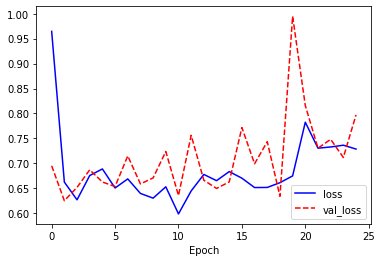

In [ ]:
# 회귀 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
# 회귀 모델 평가
model.evaluate(test_X, test_Y)

27/27 [==============================] - 0s 975us/step - loss: 0.8135


0.8135405778884888

In [ ]:
# 모델 재정의 및 학습
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=6, activation='tanh', input_shape=(9,)),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')

history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.20, callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')])

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


87/87 [==============================] - 0s 2ms/step - loss: 0.6251 - val_loss: 0.6103
Epoch 2/25
87/87 [==============================] - 0s 1ms/step - loss: 0.5875 - val_loss: 0.6409
Epoch 3/25
87/87 [==============================] - 0s 1ms/step - loss: 0.5830 - val_loss: 0.5949
Epoch 4/25
87/87 [==============================] - 0s 1ms/step - loss: 0.5760 - val_loss: 0.5927
Epoch 5/25
87/87 [==============================] - 0s 1ms/step - loss: 0.5766 - val_loss: 0.5942
Epoch 6/25
87/87 [==============================] - 0s 1ms/step - loss: 0.5754 - val_loss: 0.6128
Epoch 7/25
87/87 [==============================] - 0s 1ms/step - loss: 0.5759 - val_loss: 0.5993


In [ ]:
# 회귀 모델 평가
model.evaluate(test_X, test_Y)

27/27 [==============================] - 0s 956us/step - loss: 0.5812


0.5812036395072937

In [ ]:
df2.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'statezip'],
      dtype='object')

In [ ]:
X = df2.iloc[:,1:13]
Y = df2['price']

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units=6, activation = 'tanh', input_shape = (9,) ),
                             tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss = 'mse')



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f5cfb2a8110>>

In [ ]:
X.shape

(4311, 9)

In [ ]:
model.fit(X, Y, epochs= 10)

Epoch 1/10
135/135 [==============================] - 1s 1ms/step - loss: 51110694912.0000
Epoch 2/10
135/135 [==============================] - 0s 1ms/step - loss: 49429151744.0000
Epoch 3/10
135/135 [==============================] - 0s 1ms/step - loss: 49277988864.0000
Epoch 4/10
135/135 [==============================] - 0s 1ms/step - loss: 49066610688.0000
Epoch 5/10
135/135 [==============================] - 0s 1ms/step - loss: 49359994880.0000
Epoch 6/10
135/135 [==============================] - 0s 1ms/step - loss: 49651773440.0000
Epoch 7/10
135/135 [==============================] - 0s 1ms/step - loss: 48796450816.0000
Epoch 8/10
135/135 [==============================] - 0s 1ms/step - loss: 48755421184.0000
Epoch 9/10
135/135 [==============================] - 0s 1ms/step - loss: 51071782912.0000
Epoch 10/10
135/135 [==============================] - 0s 1ms/step - loss: 48715812864.0000


In [ ]:
train_X 

array([[-0.40000964, -1.51683888, -1.18227486, ..., -0.26822853,
        -0.88746885, -0.66891225],
       [-0.40000964, -0.82051875, -0.82441135, ..., -0.26822853,
        -0.50586916, -0.66891225],
       [-0.40000964,  0.22396143, -0.58994905, ..., -0.26822853,
        -0.25585558, -0.66891225],
       ...,
       [-0.40000964,  0.57212149,  1.44617093, ..., -0.26822853,
         1.91531502, -0.66891225],
       [-0.40000964, -0.82051875, -0.28144602, ..., -0.26822853,
         0.07310966, -0.66891225],
       [ 0.74458225,  0.57212149,  0.77980439, ..., -0.26822853,
         1.2047501 , -0.66891225]])

In [ ]:
df3 = df2

In [ ]:
print(df3['price'].describe())
print(df3['price'].value_counts)

count    4.311000e+03
mean     4.874569e+05
std      2.156596e+05
min      7.800000e+03
25%      3.200000e+05
50%      4.500000e+05
75%      6.150000e+05
max      1.150000e+06
Name: price, dtype: float64
<bound method IndexOpsMixin.value_counts of 0       313000.0000
2       342000.0000
3       420000.0000
4       550000.0000
5       490000.0000
           ...     
4595    308166.6667
4596    534333.3333
4597    416904.1667
4598    203400.0000
4599    220600.0000
Name: price, Length: 4311, dtype: float64>


price 범주화 

(array([ 24., 373., 969., 902., 760., 534., 341., 212., 121.,  75.]),
 array([   7800.,  122020.,  236240.,  350460.,  464680.,  578900.,
         693120.,  807340.,  921560., 1035780., 1150000.]),
 <a list of 10 Patch objects>)

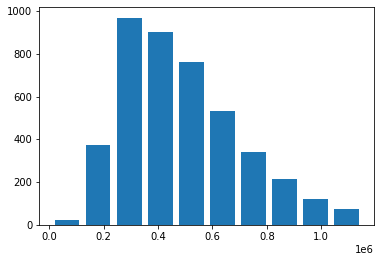

In [ ]:
plt.hist(df3['price'], bins=10, rwidth=0.8)

(array([ 24., 373., 969., 902., 760., 534., 341., 212., 121.,  75.]),
 array([   7800.,  122020.,  236240.,  350460.,  464680.,  578900.,
         693120.,  807340.,  921560., 1035780., 1150000.]),
 <a list of 10 Patch objects>)

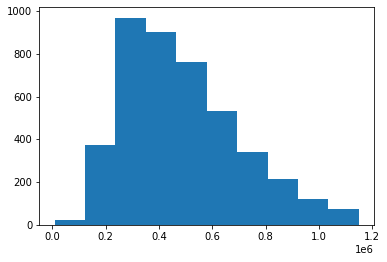

In [ ]:
plt.hist(df3['price'])

In [ ]:
df3['price'] = (df3['price']).astype(int)

In [ ]:
df3.loc[df3['price'] <= 350460, 'new price'] = 0
df3.loc[(df3['price'] < 578900) & (df3['price'] > 350460) , 'new price'] = 1
df3.loc[df3['price'] >= 578900, 'new price'] = 2

In [ ]:
df3['new price']

0       0.0
2       0.0
3       1.0
4       1.0
5       1.0
       ... 
4595    0.0
4596    1.0
4597    1.0
4598    0.0
4599    0.0
Name: new price, Length: 4311, dtype: float64

count    4311.000000
mean        0.980747
std         0.783739
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: new price, dtype: float64
1.0    1662
0.0    1366
2.0    1283
Name: new price, dtype: int64


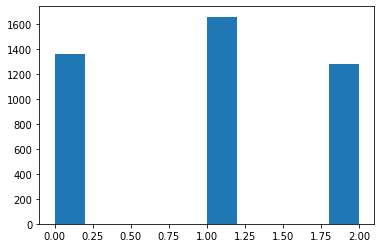

In [ ]:
plt.hist(df3['new price'])
print(df3['new price'].describe())
print(df3['new price'].value_counts())

In [ ]:
# 데이터 정규화 및 train, test 데이터 분리
del df3['price']
df3_norm = (df3 - df3.min()) / (df3.max() - df3.min())
df3_shuffle = df3_norm.sample(frac=1)
df3_np = df3_shuffle.to_numpy()


train_idx = int(len(df3_np) * 0.8)
train_X, train_Y = df3_np[:train_idx, :-1], df3_np[:train_idx, -1]
test_X, test_Y = df3_np[train_idx:, :-1], df3_np[train_idx:, -1]
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=3)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=3)

In [ ]:
# 다항 분류 모델 생성 및 학습
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=128, activation='relu', input_shape=(9,)),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=3, activation='softmax')
])
print(model.summary())

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.2)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 128)               1280      
                                                                 
 dense_15 (Dense)            (None, 64)                8256      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 3)                 99        
                                                                 
Total params: 11,715
Trainable params: 11,715
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/25


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


87/87 [==============================] - 1s 6ms/step - loss: 0.5448 - accuracy: 0.7379 - val_loss: 0.4646 - val_accuracy: 0.7812
Epoch 2/25
87/87 [==============================] - 0s 3ms/step - loss: 0.4757 - accuracy: 0.7785 - val_loss: 0.4617 - val_accuracy: 0.7768
Epoch 3/25
87/87 [==============================] - 0s 3ms/step - loss: 0.4531 - accuracy: 0.7908 - val_loss: 0.4637 - val_accuracy: 0.7899
Epoch 4/25
87/87 [==============================] - 0s 2ms/step - loss: 0.4572 - accuracy: 0.7861 - val_loss: 0.4665 - val_accuracy: 0.7884
Epoch 5/25
87/87 [==============================] - 0s 2ms/step - loss: 0.4575 - accuracy: 0.7835 - val_loss: 0.4765 - val_accuracy: 0.7754
Epoch 6/25
87/87 [==============================] - 0s 2ms/step - loss: 0.4622 - accuracy: 0.7908 - val_loss: 0.4784 - val_accuracy: 0.7783
Epoch 7/25
87/87 [==============================] - 0s 2ms/step - loss: 0.4520 - accuracy: 0.7864 - val_loss: 0.4613 - val_accuracy: 0.7884
Epoch 8/25
87/87 [=============

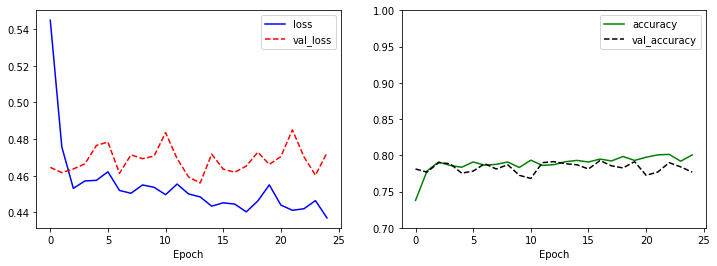

In [ ]:
# 다항 분류 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [ ]:
model.evaluate(test_X, test_Y)

27/27 [==============================] - 0s 944us/step - loss: 0.4434 - accuracy: 0.8065


[0.4434105455875397, 0.8064889907836914]